In [11]:
import sys

from keras.models import Sequential
from keras.layers import InputLayer, Dense
import pandas as pd
import numpy as np

In [12]:
#Importing data
x_train = pd.read_csv('../pre-processamento-e-transformacao/X_TRAIN.csv')
x_test = pd.read_csv('../pre-processamento-e-transformacao/X_TEST.csv')
y_train = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN.csv')
y_test = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST.csv')
y_train_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN_LOG.csv')
y_test_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST_LOG.csv')

In [13]:
# Normalizar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)


In [14]:
# Creating model
input_neuron, hidden_neuron, output_neuron = np.size(x_train, 1), 3, 1

mlp = Sequential([
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron)
])

In [15]:
# Summary representation
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 867       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compiling model
mlp.compile(optimizer="adam", loss="mse")

In [17]:
# Training the model
batch_size = 16
Log = mlp.fit(x_train, y_train, batch_size=batch_size, epochs=100)

Epoch 1/100
64/64 [==============================] - 0s 542us/step - loss: 38892580864.0000
Epoch 2/100
64/64 [==============================] - 0s 521us/step - loss: 38892015616.0000
Epoch 3/100
64/64 [==============================] - 0s 513us/step - loss: 38891102208.0000
Epoch 4/100
64/64 [==============================] - 0s 495us/step - loss: 38889840640.0000
Epoch 5/100
64/64 [==============================] - 0s 501us/step - loss: 38888210432.0000
Epoch 6/100
64/64 [==============================] - 0s 501us/step - loss: 38886207488.0000
Epoch 7/100
64/64 [=========================

## Medidas Desempenho

* **r2_score**(y_test, y_pred)

* **Gráfico de Dispersão**

* **median_absolute_error**(y_test, y_pred)


(0.0, 2000.0)

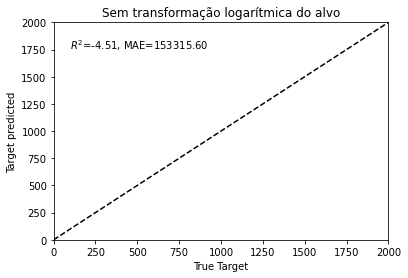

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

y_pred = mlp.predict(x_test)

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])


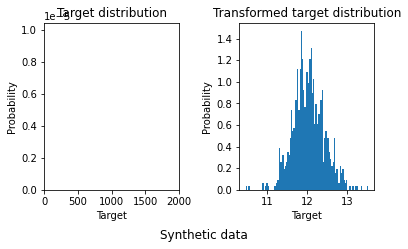

In [19]:
## Y log

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_train_log, bins=100, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.06, x=0.53)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


In [20]:
## Predicting with y log

Log = mlp.fit(x_train, y_train_log, batch_size=batch_size, epochs=100)

y_pred = np.expm1(mlp.predict(x_test))

r2 = r2_score(y_test_log, y_pred)

mae = median_absolute_error(y_test_log, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test_log, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])

Epoch 1/100
64/64 [==============================] - 0s 937us/step - loss: 12745980.0000
Epoch 2/100
64/64 [==============================] - 0s 856us/step - loss: 12746896.0000
Epoch 3/100
64/64 [==============================] - 0s 839us/step - loss: 12737533.0000
Epoch 4/100
64/64 [==============================] - 0s 817us/step - loss: 12727845.0000
Epoch 5/100
64/64 [==============================] - 0s 864us/step - loss: 12717852.0000

/tmp/ipykernel_11825/3220826848.py:5: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(mlp.predict(x_test))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').